In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score



In [5]:
path = './winequality.csv'
df = pd.read_csv(path)

df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


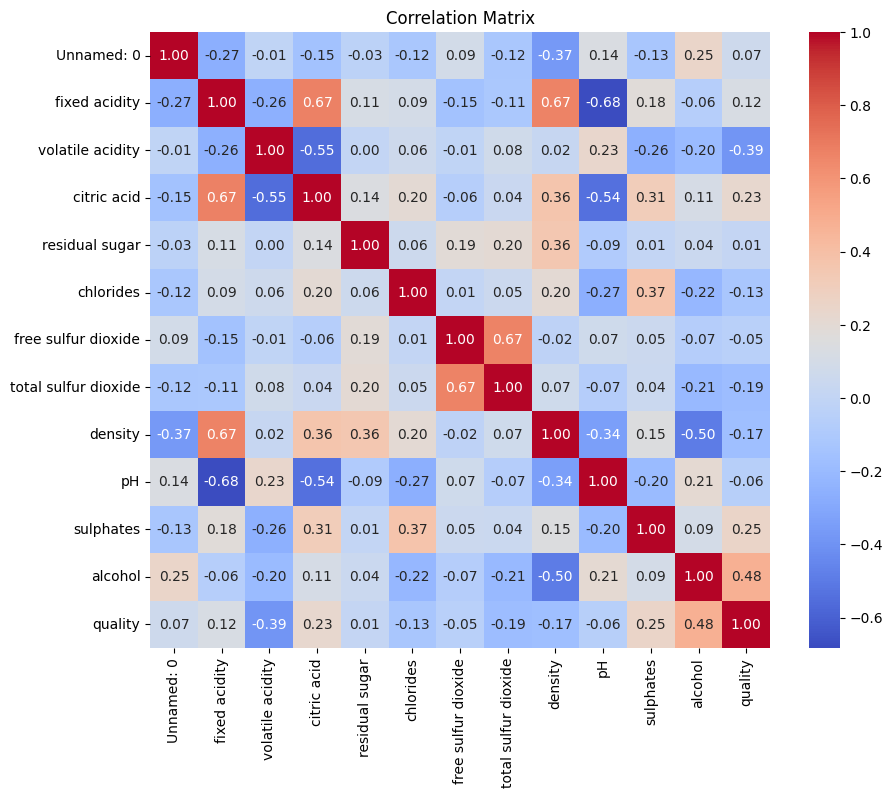

In [6]:
# 상관관계 행렬 계산
corr_matrix = df.corr()

# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/tmp/ipykernel_21372/417289235.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=grouped_data, palette='viridis')


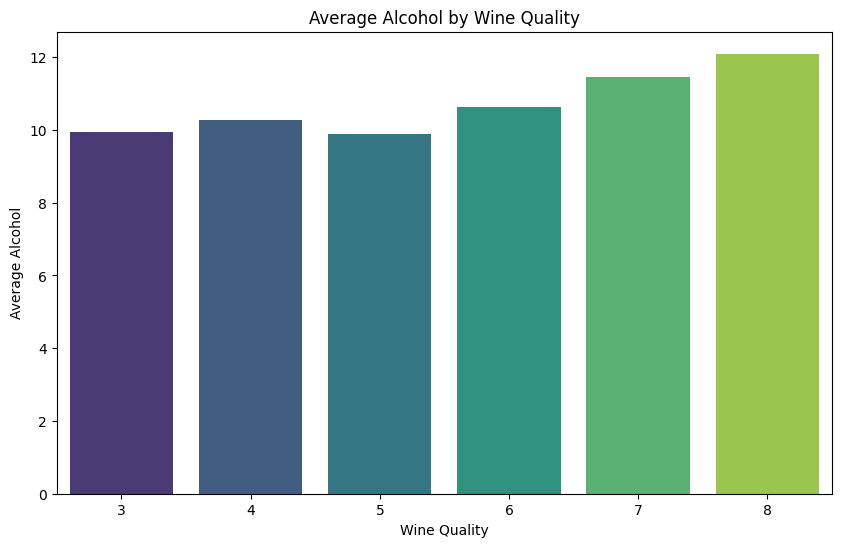

/tmp/ipykernel_21372/417289235.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='residual sugar', data=grouped_data, palette='magma')


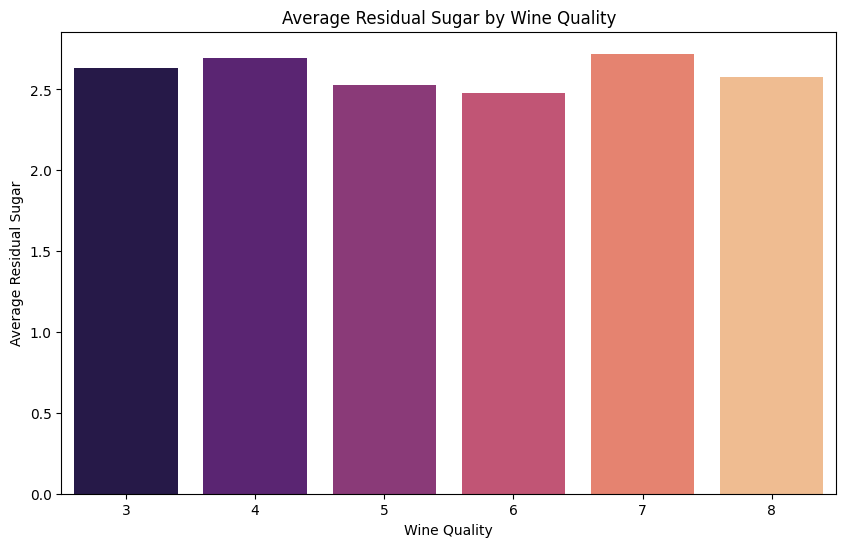

In [7]:
# 와인의 등급별로 평균 알코올 도수와 평균 당도 구해보기

grouped_data = df.groupby('quality').agg({
    'alcohol': 'mean',
    'residual sugar': 'mean'
}).reset_index()

# 시각화: 와인 등급별 평균 알코올 도수
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=grouped_data, palette='viridis')
plt.title('Average Alcohol by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol')
plt.show()

# 시각화: 와인 등급별 평균 잔류 당도
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='residual sugar', data=grouped_data, palette='magma')
plt.title('Average Residual Sugar by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Residual Sugar')
plt.show()

# 와인 등급이 높을 수록 알코올 도수가 조금씩 높아지긴 하나 당도는 와인 등급과 크게 연관 없어보임


In [10]:

# 데이터 로드 및 전처리
data = pd.read_csv('./winequality.csv')
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLflow 실험 설정 및 모델 학습
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment('Wine Quality Prediction')

with mlflow.start_run():
    # 모델 학습
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # 예측 및 평가
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    
    # 파라미터, 메트릭 및 모델 로깅
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.sklearn.log_model(model, "random_forest_model")
    
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")



2024/08/19 10:49:56 INFO mlflow.tracking.fluent: Experiment with name 'Wine Quality Prediction' does not exist. Creating a new experiment.
/home/minhyeok/.pyenv/versions/mlflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2024/08/19 10:50:21 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Accuracy: 0.665625, Precision: 0.6354617011278195, Recall: 0.665625
